<a href="https://colab.research.google.com/github/NahidFathima/NahidF_INFO5731_Fall2023/blob/main/Syed_NahidFathima_Assignment_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
pip install pandas nltk

In [ ]:
# 1. Frequency of the N-grams

import pandas as pd
from nltk import ngrams
from nltk.corpus import stopwords
from collections import Counter

# Download NLTK stopwords
import nltk
nltk.download('stopwords')

# Loading the dataset
dataset_path = 'reddit_data.csv'
df = pd.read_csv(dataset_path)

# Ensure that the 'Title' column is clean and contains no NaN values
df['Title'] = df['Title'].fillna('')  # Fill NaN values with an empty string

# Function to tokenize and generate N-grams
def generate_ngrams(text, n):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word.lower() not in stop_words]
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# Set N for N-grams
N = 3

# Count the frequency of all the N-grams
all_ngrams = []
for title in df['Title']:
    ngrams_list = generate_ngrams(title, N)
    all_ngrams.extend(ngrams_list)

# Use Counter to count the frequency of each N-gram
ngram_counts = Counter(all_ngrams)

# Display all N-grams and their frequencies
for ngram, count in ngram_counts.items():
    print(f'{ngram}: {count}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nahid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Jurassic Park Deleted: 100
Park Deleted Scene: 100
Jurassic Park deleted: 100
Park deleted scene: 100
So, I've removed: 100
I've removed animations: 100
removed animations Jurassic: 100
animations Jurassic Park: 100
Jurassic Park game: 200
filming Jurassic Park: 100
Jurassic Park (1993),: 200
Park (1993), T-Rex: 100
(1993), T-Rex known: 100
T-Rex known sweat: 100
known sweat profusely: 100
sweat profusely first: 100
profusely first major: 100
first major role: 100
major role 55: 100
role 55 million: 100
55 million years.: 100
daughter watching Jurassic: 100
watching Jurassic Bark: 100
Jurassic Bark first: 100
Bark first time.: 100
Iron Pyrite Nautilus.: 100
Pyrite Nautilus. Jurassic: 100
Nautilus. Jurassic period,: 100
Jurassic period, 185: 100
period, 185 million: 100
185 million years: 100
million years old!: 100
Jeff Goldblum recreates: 100
Goldblum recreates iconic: 100
recreates iconic Jurassic: 100
iconic Jurassic Park: 100
Jurassic Park pose,: 100
Park pose, 27: 100
pose, 27 yea

In [ ]:
# 2. Probabilities for all the bigrams

# Ensure the 'Title' column is clean and contains no NaN values
df['Title'] = df['Title'].fillna('')  # Fill NaN values with an empty string

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word.lower() not in stop_words]
    bigrams_list = list(bigrams(tokens))
    bigram_counts = Counter(bigrams_list)

    bigram_probabilities = {}
    for bigram, count_w2_w1 in bigram_counts.items():
        count_w2 = tokens.count(bigram[0])  # Count of w2
        probability = count_w2_w1 / count_w2 if count_w2 > 0 else 0
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

# Calculate bigram probabilities for all titles
all_bigram_probabilities = {}
for title in df['Title']:
    title_bigram_probabilities = calculate_bigram_probabilities(title)
    all_bigram_probabilities.update(title_bigram_probabilities)

# Display bigram probabilities
for bigram, probability in all_bigram_probabilities.items():
    print(f'{bigram}: {probability:.2f}')


('Jurassic', 'Park'): 1.00
('Park', 'Deleted'): 1.00
('Deleted', 'Scene'): 1.00
('Park', 'deleted'): 1.00
('deleted', 'scene'): 1.00
('So,', "I've"): 1.00
("I've", 'removed'): 1.00
('removed', 'animations'): 1.00
('animations', 'Jurassic'): 1.00
('Park', 'game'): 1.00
('filming', 'Jurassic'): 1.00
('Park', '(1993),'): 1.00
('(1993),', 'T-Rex'): 1.00
('T-Rex', 'known'): 1.00
('known', 'sweat'): 1.00
('sweat', 'profusely'): 1.00
('profusely', 'first'): 1.00
('first', 'major'): 1.00
('major', 'role'): 1.00
('role', '55'): 1.00
('55', 'million'): 1.00
('million', 'years.'): 1.00
('daughter', 'watching'): 1.00
('watching', 'Jurassic'): 1.00
('Jurassic', 'Bark'): 1.00
('Bark', 'first'): 1.00
('first', 'time.'): 1.00
('Iron', 'Pyrite'): 1.00
('Pyrite', 'Nautilus.'): 1.00
('Nautilus.', 'Jurassic'): 1.00
('Jurassic', 'period,'): 1.00
('period,', '185'): 1.00
('185', 'million'): 1.00
('million', 'years'): 1.00
('years', 'old!'): 1.00
('Jeff', 'Goldblum'): 1.00
('Goldblum', 'recreates'): 1.00
('r

In [ ]:
import pandas as pd
from nltk import RegexpParser
from nltk import pos_tag, word_tokenize
from collections import Counter

# Download NLTK resources
import nltk
nltk.download('punkt')

# Function to extract noun phrases from a text
def extract_noun_phrases(text):
    stop_words = set(stopwords.words('english'))

    # Tokenize and perform part-of-speech tagging
    words = word_tokenize(text)
    tagged_words = pos_tag(words)

    # Define a chunk grammar for noun phrases
    chunk_grammar = "NP: {<DT>?<JJ>*<NN>}"
    chunk_parser = RegexpParser(chunk_grammar)

    # Parse the tagged words to extract noun phrases
    tree = chunk_parser.parse(tagged_words)
    noun_phrases = [ " ".join([word for word, tag in subtree.leaves()])
                    for subtree in tree.subtrees() if subtree.label() == 'NP']

    # Remove stopwords from noun phrases
    filtered_noun_phrases = [phrase for phrase in noun_phrases if phrase.lower() not in stop_words]

    return filtered_noun_phrases

# Function to calculate relative probabilities of noun phrases
def calculate_relative_probabilities(df):
    all_noun_phrases = []
    for title in df['Title']:
        noun_phrases = extract_noun_phrases(title)
        all_noun_phrases.extend(noun_phrases)

    # Count the frequency of each noun phrase
    noun_phrase_counts = Counter(all_noun_phrases)

    # Find the maximum frequency of any noun phrase
    max_frequency = max(noun_phrase_counts.values())

    # Calculate relative probabilities
    relative_probabilities = {}
    for title in df['Title']:
        noun_phrases = extract_noun_phrases(title)
        relative_probabilities[title] = {noun_phrase: noun_phrase_counts[noun_phrase] / max_frequency
                                         for noun_phrase in noun_phrases}

    return relative_probabilities

# Calculate and display the relative probabilities as a table
relative_probabilities = calculate_relative_probabilities(df)
table_df = pd.DataFrame.from_dict(relative_probabilities, orient='index')
print(table_df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nahid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                    scene  the game  \
Jurassic Park deleted scene                           0.2       NaN   
So, I've removed some animations from Jurassic ...    NaN       0.2   
During the filming of Jurassic Park (1993), T-R...    NaN       NaN   
My daughter watching Jurassic Bark for the firs...    NaN       NaN   
The Iron Pyrite Nautilus. This is from the Jura...    NaN       NaN   
...                                                   ...       ...   
🤨                                                     NaN       NaN   
I was watching Jurassic Park on Google Chrome (...    NaN       NaN   
Jurassic Park is just as good today as it was 2...    NaN       NaN   
I quit my job in the middle of the pandemic to ...    NaN       NaN   
In Jurassic Park, you can see Dr. Wu erasing a ...    NaN       NaN   

                                                    the filming  \
Jurassic Park deleted scene                                 NaN   
So, I've remo

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# 1. Dcouments tf-idf matrix

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
dataset_path = 'reddit_data.csv'
df = pd.read_csv(dataset_path)

# Extract the 'Title' column as a list of reviews
reviews = df['Title'].tolist()

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the reviews to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(reviews)

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF matrix
print(tfidf_df)



      000   13  1345x931   14  1500   18  185  1895  18th      1993  ...  \
0     0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.000000  ...   
1     0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.000000  ...   
2     0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.000000  ...   
3     0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.173039  ...   
4     0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.000000  ...   
...   ...  ...       ...  ...   ...  ...  ...   ...   ...       ...  ...   
9995  0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.000000  ...   
9996  0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.000000  ...   
9997  0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.000000  ...   
9998  0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.000000  ...   
9999  0.0  0.0       0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.000000  ...   

      worst     would  wraps  wrong        wu  yarra     years  yet      you  \
0      

In [ ]:
# 2. Ranking dociment based on query cosine similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the reviews to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(reviews)

# Represent the query as a vector using the TF-IDF matrix
query = "An Outstanding movie with a haunting performance and best character development"
query_vector = vectorizer.transform([query])

# Calculate cosine similarity between the query vector and document vectors
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

# Rank the documents based on cosine similarity
df['Cosine_Similarity'] = cosine_similarities
ranked_documents = df.sort_values(by='Cosine_Similarity', ascending=False)

# Display the ranked documents
print(ranked_documents[['Title', 'Cosine_Similarity']])


                                                  Title  Cosine_Similarity
6416  Plot of next Jurassic park movie .credits@pet_...           0.238069
1416  Plot of next Jurassic park movie .credits@pet_...           0.238069
9016  Plot of next Jurassic park movie .credits@pet_...           0.238069
9716  Plot of next Jurassic park movie .credits@pet_...           0.238069
6016  Plot of next Jurassic park movie .credits@pet_...           0.238069
...                                                 ...                ...
4037  I turned my Gecko’s enclosure into a scene fro...           0.000000
4035  🔥The blue Herron is straight out of Jurassic P...           0.000000
4034                                     Jurassic Prank           0.000000
4033  ‘Jurassic World: Dominion’ Wraps Unprecedented...           0.000000
9999          New Poster for 'Jurassic World: Dominion'           0.000000

[10000 rows x 2 columns]


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# 1. 300 dimension word embedding

!pip install gensim

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Extract the 'Title' column as a list of reviews
reviews = df['Title'].tolist()

# Tokenize the reviews into words
tokenized_reviews = [word_tokenize(review.lower()) for review in reviews]

# Define and train the Word2Vec model
embedding_size = 300  # You can adjust this as needed
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=embedding_size, window=5, min_count=1, workers=4)

# Save the trained model
model_path = 'C:/Users/Nahid/Downloads/word2vec_model.bin'
word2vec_model.save(model_path)

# Load the Word2Vec model
word2vec_model = Word2Vec.load(model_path)

vector = word2vec_model.wv['movie']
print(vector)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nahid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[ 7.48622715e-02  2.30747998e-01  1.13724947e-01  4.91177112e-01
 -6.34218678e-02 -4.83901501e-01  4.61349070e-01  6.09676421e-01
 -1.55596018e-01  3.69057059e-01  4.97121103e-02  3.68861891e-02
  1.42405197e-01 -2.09822863e-01  8.42915177e-02 -7.55762994e-01
  7.03290701e-02  2.29093134e-01 -1.10268921e-01 -7.33791813e-02
 -2.61692077e-01  1.65497046e-02  5.81382811e-01  4.18588102e-01
 -1.88532189e-01  3.38085145e-01 -6.32425547e-01 -2.46634141e-01
 -3.86910975e-01  2.23521926e-02  2.21351370e-01 -1.08152412e-01
 -2.63934731e-01 -1.01780295e-01  1.94321185e-01  3.21691692e-01
  6.35812059e-02 -3.91776919e-01 -3.66485536e-01  4.50245142e-01
 -1.58028901e-01 -2.57921785e-01 -1.42382935e-01  1.91823140e-01
 -3.32287073e-01  4.50645804e-01  3.62728357e-01  1.24353044e-01
 -6.33716807e-02  4.87410456e-01  3.92797291e-01  1.33647844e-01
 -3.83776546e-01 -3.27034593e-01 -3.58972907e-01  6.44798398e-01
 -1.67125702e-01  1.82934985e-01 -2.53104955e-01 -1.45636827e-01
  7.77013004e-02 -2.29900

C:\Users\Nahid\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129320 (\N{FACE WITH ONE EYEBROW RAISED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nahid\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


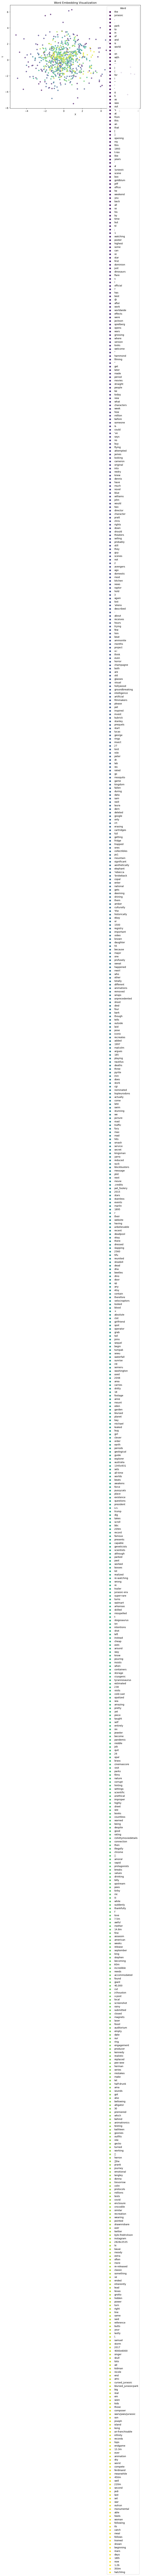

In [ ]:
# 2. Visualization

import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the Word2Vec model
word2vec_model = Word2Vec.load(model_path)

# Extract word vectors for visualization
word_vectors = word2vec_model.wv.vectors

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
word_vectors_2D = pca.fit_transform(word_vectors)

# Create a DataFrame for plotting
words = list(word2vec_model.wv.index_to_key)
word_df = pd.DataFrame(word_vectors_2D, columns=['X', 'Y'])
word_df['Word'] = words

# Plot the word vectors
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', data=word_df, hue='Word', palette='viridis', alpha=0.7)
plt.title('Word Embedding Visualization')
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
Link : https://github.com/NahidFathima/NahidF_INFO5731_Fall2023/blob/main/sentimentanalysis_reddit_data.csv